# 石炭、原油、石油ガス、液化天然ガス、金の相場、銀の相場、プラチナの相場と為替変動に関する重要な特性を可視化する
---
## 探索的データ解析
- 散布図行列の作成
- データの分布と外れ値が含まれているか調べる。

In [69]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.columns = ['coal', 'crude oil', 'coal gas', 'liquefied natural gas','yen_gold_av','yen_platinum_av','yen_silver_av','exchange rate after a month']
df.head()

,coal,crude oil,coal gas,liquefied natural gas,yen_gold_av,yen_platinum_av,yen_silver_av,exchange rate after a month
0,-0.020279,-0.163987,-0.009600,0.006485,0.022417,0.065256,0.057923,-0.009034
1,0.020536,-0.007016,0.000636,-0.006106,-0.021926,-0.042219,-0.037190,0.043839
2,0.066874,0.050738,0.042403,0.027418,0.038012,0.013397,0.008047,0.022318
3,0.079307,0.042530,0.010837,0.021257,0.012207,0.042217,0.017030,-0.015324
4,0.005649,0.000284,-0.057594,-0.025932,0.030612,0.007774,-0.000523,0.001832


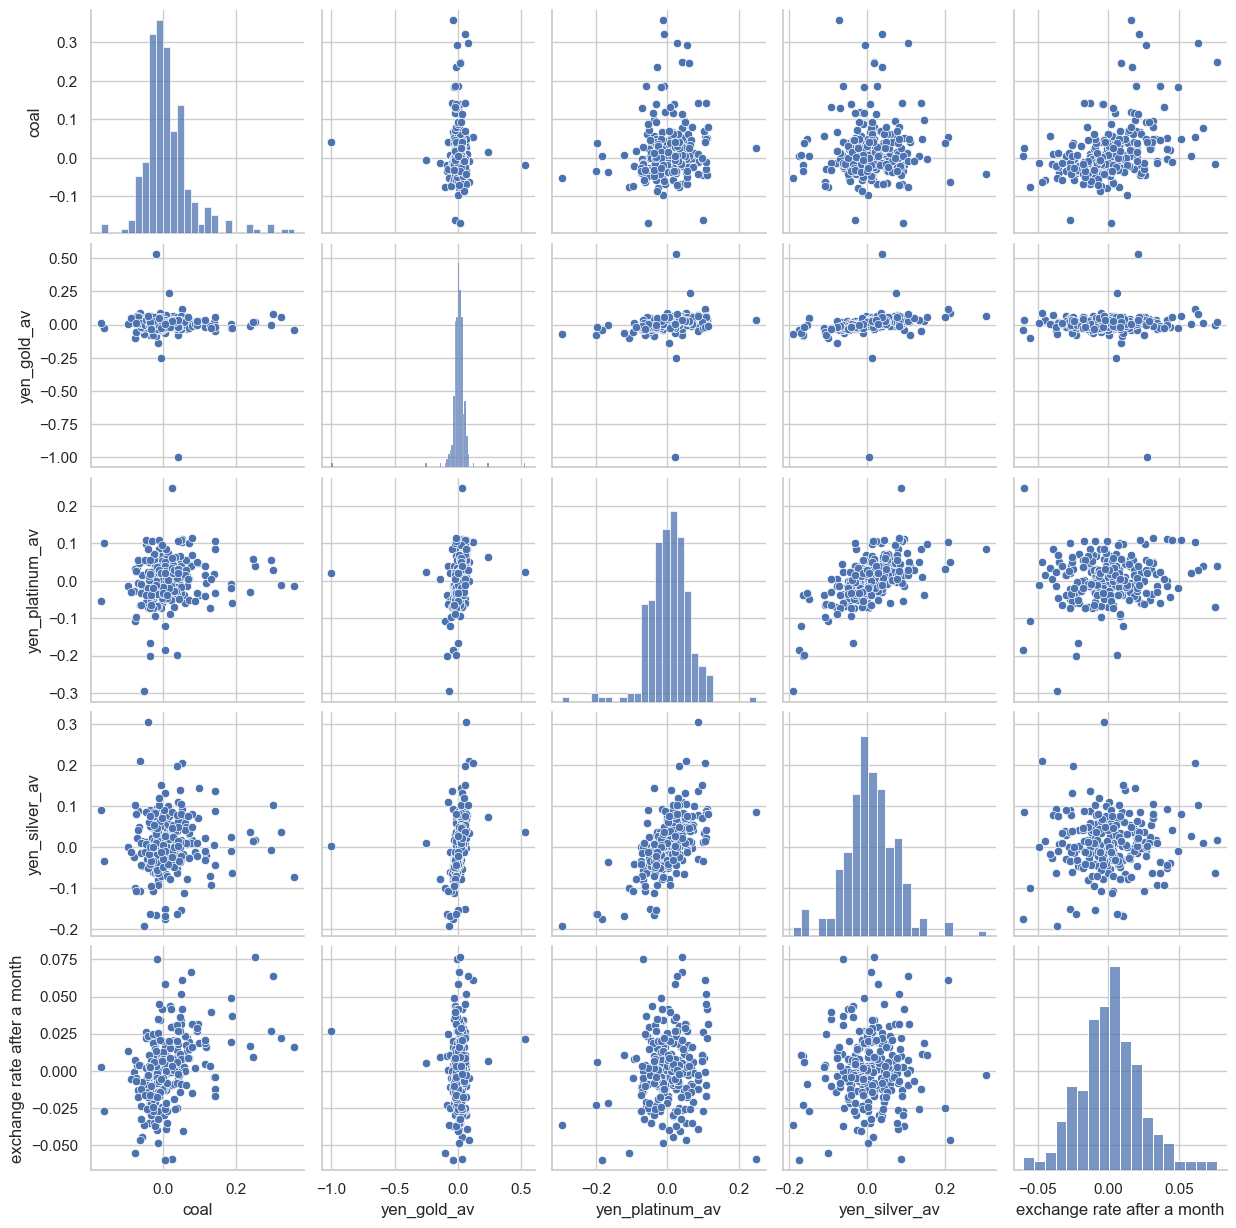

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols = ['coal', 'yen_gold_av', 'yen_platinum_av', 'yen_silver_av', 'exchange rate after a month']
sns.pairplot(df[cols], height=2.5)
plt.show()

# ピアソンの積率相関係数
## 共分散


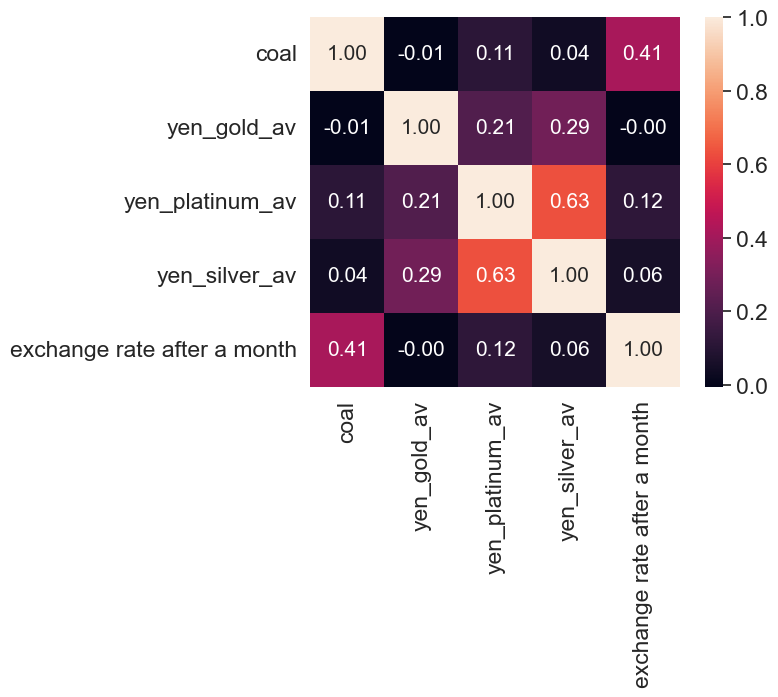

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

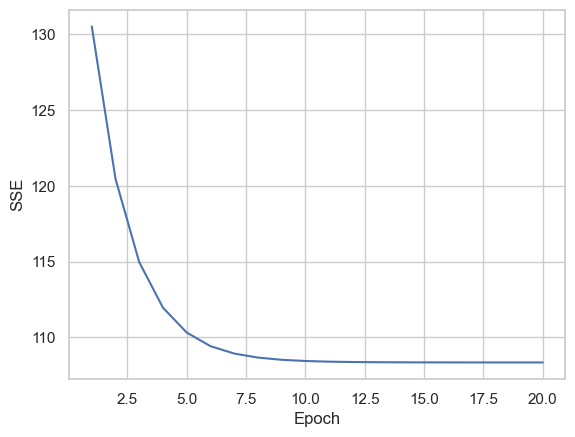

In [24]:
class LinearRegressionGD(object):
    def __init__(self,eta=0.001, n_iter=20):
        self.eta=eta
        self.n_iter=n_iter
    
    def fit(self,XX = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/10_12.png', dpi=300)
plt.show(),y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output=self.net_input(X)
            errors=(y-output)
            self.w_[1:] = self.w_[1:] + self.eta * X.T.dot(errors) 
            self.w_[0] = self.w_[0] +  self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)
    
X = df[['coal']].values
y = df['exchange rate after a month'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
# print(X_std)
# print(f'{len(y_std)}:{y_std}')
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

plt.plot(range(1, lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

C:\Users\naoya\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


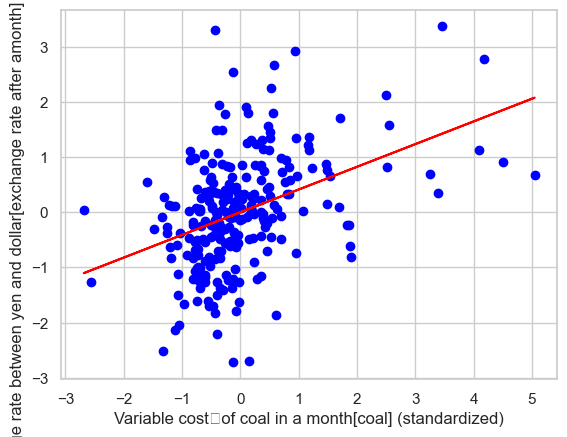

In [26]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])model.predict(X),color='red')
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('Variable cost　of coal in a month[coal] (standardized)')
plt.ylabel('Exchange rate between yen and dollar[exchange rate after amonth] (standardized)')
plt.show()

In [27]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.411
Intercept: -0.000


In [43]:
coalVC_std = sc_x.transform([[1]])
exchangeRate_std = lr.predict(coalVC_std).reshape(-1,1)
print("up 1 of coal price rate: %.3f" % sc_y.inverse_transform(exchangeRate_std))


up 1 of coal price rate: 0.135


# sickit-learnを用いた回帰モデルの係数の推定
- LinearRegression()を用いる.

In [44]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.136
Intercept: -0.001


C:\Users\naoya\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


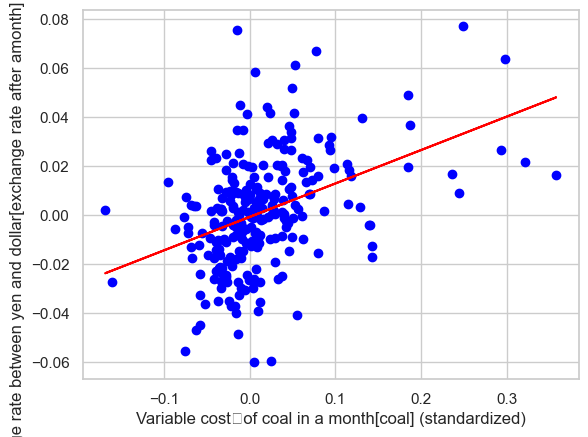

In [ ]:
lin_regplot(X, y, slr)
plt.xlabel('Variable cost　of coal in a month[coal] (standardized)')
plt.ylabel('Exchange rate between yen and dollar[exchange rate after amonth] (standardized)')
plt.show()

# RANSACを用いたロバスト回帰モデルの学習
1. 正常値としてランダムな数のサンプルを選択し、モデルを学習させる.
2. 学習済みのモデルに対し、その他すべてのデータ点を評価し、ユーザー指定の許容範囲となるデータ点を正常値に追加する.
3. 全ての正常値を用いてモデルを再学習させる.
4. 正常値に対する学習済みのモデルの誤差を推定する.
5. モデルの性能がユーザ指定の閾値の条件を満たしている場合、またはイテレーションが規定の回数に達した場合はアルゴリズムを終了する.そうでなければステップ1に戻る.

C:\Users\naoya\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


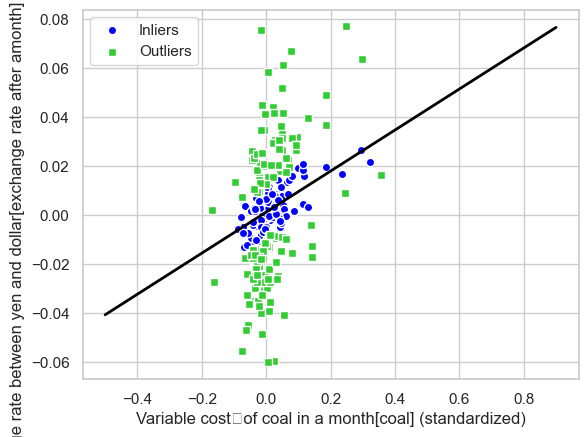

In [58]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error',  
                         residual_threshold=0.01, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask) 

line_X = np.arange(-0.5, 1.0, 0.1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Variable cost　of coal in a month[coal] (standardized)')
plt.ylabel('Exchange rate between yen and dollar[exchange rate after amonth] (standardized)')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [60]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 0.084
Intercept: 0.001


C:\Users\naoya\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


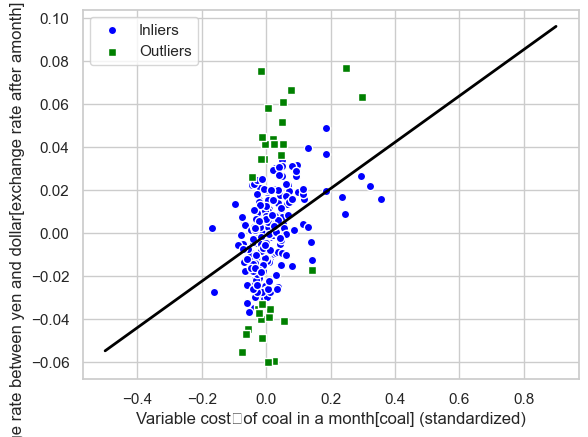

In [67]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error',  
                         residual_threshold=0.03, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask) 

line_X = np.arange(-0.5, 1.0, 0.1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='green', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Variable cost　of coal in a month[coal] (standardized)')
plt.ylabel('Exchange rate between yen and dollar[exchange rate after amonth] (standardized)')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [68]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 0.108
Intercept: -0.001


# 線形回帰のモデル評価

In [71]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['exchange rate after a month'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

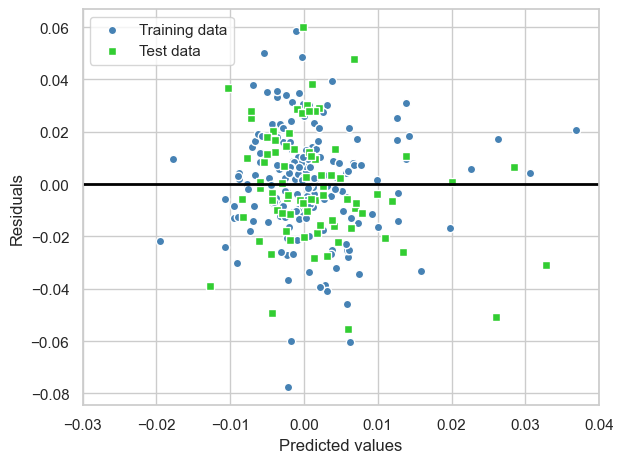

In [75]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-0.03, xmax=0.04, color='black', lw=2)
plt.xlim([-0.03, 0.04])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()



In [76]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 0.110, test: 0.233


# 回帰に正則化手法を使用

In [81]:
# リッジ回帰モデル---正則化の強さをalphaパラメタで指定
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)


# LASSO回帰モデル---正則化の強さをalphaパラメタで指定
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)


# Elastic Netモデル---l1_ratioによりL1ペナルティとL2ペナルティの比率を指定
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 多項式回帰:線形回帰モデルから曲線を見出す

C:\Users\naoya\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


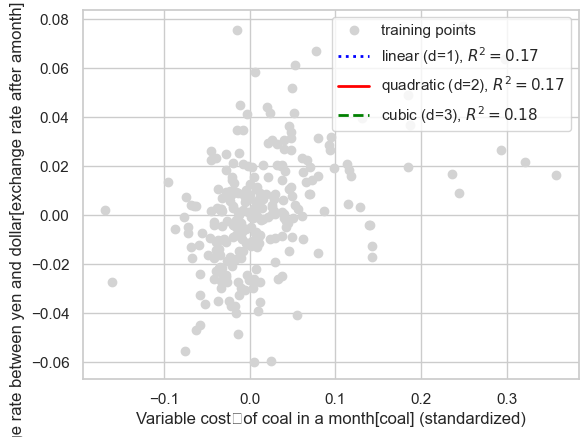

In [83]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['coal']].values
y = df['exchange rate after a month'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeaturbes(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('Variable cost　of coal in a month[coal] (standardized)')
plt.ylabel('Exchange rate between yen and dollar[exchange rate after amonth] (standardized)')
plt.legend(loc='upper right')

#plt.savefig('images/10_11.png', dpi=300)
plt.show()

In [84]:
print('Training R^2 linear:%.3f quadratic: %.3f cubic: %.3f' % (linear_r2, quadratic_r2, cubic_r2))

Training R^2 linear:0.170 quadratic: 0.174 cubic: 0.183


In [89]:
# X = df[['coal']].values
# y = df['exchange rate after a month'].values

# # transform features
# X_log = np.log(X)
# y_sqrt = np.sqrt(y)

# # fit features
# X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

# regr = regr.fit(X_log, y_sqrt)
# y_lin_fit = regr.predict(X_fit)
# linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# # plot results
# plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

# plt.plot(X_fit, y_lin_fit, 
#          label='linear (d=1), $R^2=%.2f$' % linear_r2, 
#          color='blue', 
#          lw=2)

# plt.xlabel('Variable cost　of coal in a month[coal] (standardized)')
# plt.ylabel('Exchange rate between yen and dollar[exchange rate after amonth] (standardized)')
# plt.legend(loc='lower left')

# plt.tight_layout()
# #plt.savefig('images/10_12.png', dpi=300)
# plt.show()

# ランダムフォレストを用いて非線形関係を扱う
- 決定木回帰
- ランダムフォレスト回帰

C:\Users\naoya\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


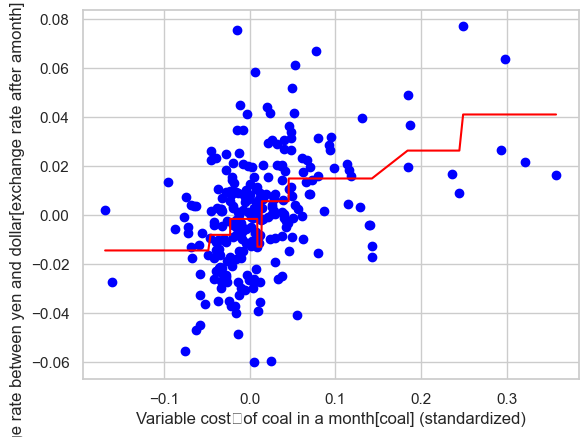

In [90]:
from sklearn.tree import DecisionTreeRegressor

X = df[['coal']].values
y = df['exchange rate after a month'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Variable cost　of coal in a month[coal] (standardized)')
plt.ylabel('Exchange rate between yen and dollar[exchange rate after amonth] (standardized)')
#plt.savefig('images/10_13.png', dpi=300)
plt.show()

In [92]:
X = df.iloc[:, :-1].values
y = df['exchange rate after a month'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [93]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\naoya\anaconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train: 0.000, test: 0.000
R^2 train: 0.853, test: 0.104


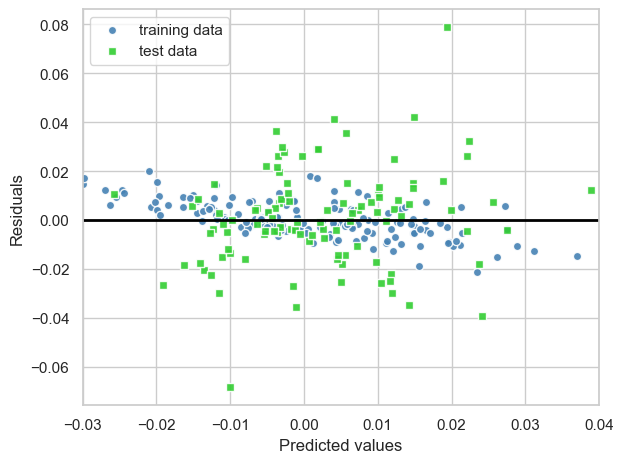

In [94]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-0.03, xmax=0.04, color='black', lw=2)
plt.xlim([-0.03, 0.04])
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

# 参考サイト

<a href='http://whitewell.sakura.ne.jp/AI/2019/Chapter10.html'>Python機械学習プログラミング-達人データサイエンティストによる理論と実践-